# Thesis Notebook Caro Pe

## Imports

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## CSV files input to the Notebook

In [13]:
#Köln Bikes Sets
koeln_2020 = "./koeln_bikes_dataset/koeln_2020.csv"
koeln_2021 = "./koeln_bikes_dataset/koeln_2021.csv"
koeln_2022 = "./koeln_bikes_dataset/koeln_2022.csv"

#munich datasets per year
muc_2022_dataset = "./munich_bikes_dataset/munich2022.csv"
muc_2021_dataset = "./munich_bikes_dataset/munich2021.csv"
muc_2020_dataset = "./munich_bikes_dataset/munich2020.csv"
muc_2019_dataset = "./munich_bikes_dataset/munich2019.csv"
muc_2023 = "./munich2023.csv"

augsburg_dataset = "./augsburg_bikes.csv"
freiburg_dataset="./Freiburg_bikes.csv"
stuttgart_dataset = "./stuttgart_bikes.csv"
wuerzburg_dataset = "./Wuerzburg_modified.csv"

## Defining the data sets as data frames 

In [14]:
df_wuerzburg = pd.read_csv(wuerzburg_dataset)
df_augsburg = pd.read_csv(augsburg_dataset)
df_freiburg = pd.read_csv(freiburg_dataset)
df_stuttgart = pd.read_csv(stuttgart_dataset)

#Munich datasets
df_muc_2022 = pd.read_csv(muc_2022_dataset)
df_muc_2021 = pd.read_csv(muc_2021_dataset)
df_muc_2020 = pd.read_csv(muc_2020_dataset)
df_muc_2019 = pd.read_csv(muc_2019_dataset)
df_muc_2023 = pd.read_csv(muc_2023)

#Köln datasets
df_koeln_2020 = pd.read_csv(koeln_2020)
df_koeln_2021 = pd.read_csv(koeln_2021)
df_koeln_2022 = pd.read_csv(koeln_2022)

## Munich Data Sets

In [15]:
df_muc_2019.info()
df_muc_2020.info()
df_muc_2021.info()
df_muc_2022.info()
df_muc_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datum          2159 non-null   object 
 1   zaehlstelle    2159 non-null   object 
 2   uhrzeit_start  2159 non-null   object 
 3   uhrzeit_ende   2159 non-null   object 
 4   richtung_1     2125 non-null   float64
 5   richtung_2     2125 non-null   float64
 6   gesamt         2125 non-null   float64
 7   min.temp       2159 non-null   float64
 8   max.temp       2159 non-null   float64
 9   niederschlag   2159 non-null   float64
 10  bewoelkung     2159 non-null   int64  
 11  sonnenstunden  2159 non-null   float64
 12  kommentar      34 non-null     object 
dtypes: float64(7), int64(1), object(5)
memory usage: 219.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------       

In [20]:
# Create a new column 'kommentar' filled with blanks
df_muc_2023['kommentar'] =  np.nan

df_muc_2023['kommentar'] = df_muc_2023['kommentar'].astype('object')

# Display the DataFrame to verify the new column
df_muc_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datum          2006 non-null   object 
 1   uhrzeit_start  2006 non-null   object 
 2   uhrzeit_ende   2006 non-null   float64
 3   zaehlstelle    2006 non-null   object 
 4   richtung_1     1996 non-null   float64
 5   richtung_2     1996 non-null   float64
 6   gesamt         1996 non-null   float64
 7   min.temp       2006 non-null   float64
 8   max.temp       2006 non-null   float64
 9   niederschlag   2006 non-null   float64
 10  bewoelkung     2006 non-null   int64  
 11  sonnenstunden  2006 non-null   float64
 12  kommentar      0 non-null      object 
dtypes: float64(8), int64(1), object(4)
memory usage: 203.9+ KB


In [25]:
# Save the DataFrame to a CSV file
df_muc_2023.to_csv('munich2023.csv', index=False)

In [32]:
df_munich = pd.concat([df_muc_2019,df_muc_2020,df_muc_2021,df_muc_2022,df_muc_2023], ignore_index=True)
#df_munich.info()
df_munich.to_csv('munich_bikes.csv', index=False)

In [35]:
# List of columns to drop
columns_to_drop = ['uhrzeit_start', 'uhrzeit_ende', 'richtung_1', 'richtung_2',
                   'min.temp', 'max.temp', 'niederschlag', 'bewoelkung', 
                   'sonnenstunden', 'kommentar']

# Drop the specified columns
df_munich_v2 = df_munich.drop(columns=columns_to_drop)

# Now the df_munich_v2 data frame only contains the columns corresponding to the Date, Location and Total Num of Bikes counted at that location
# Display the DataFrame after dropping columns
df_munich_v2.info()
print(df_munich_v2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10741 entries, 0 to 10740
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datum        10741 non-null  object 
 1   zaehlstelle  10741 non-null  object 
 2   gesamt       10299 non-null  float64
dtypes: float64(1), object(2)
memory usage: 251.9+ KB
            datum zaehlstelle  gesamt
0      2019-01-01      Arnulf   152.0
1      2019-01-02      Arnulf   391.0
2      2019-01-03      Arnulf   377.0
3      2019-01-04      Arnulf   282.0
4      2019-01-05      Arnulf    53.0
...           ...         ...     ...
10736  2023.12.27     Erhardt  1583.0
10737  2023.12.28     Erhardt  1810.0
10738  2023.12.29     Erhardt  1898.0
10739  2023.12.30     Erhardt  1755.0
10740  2023.12.31     Erhardt  1074.0

[10741 rows x 3 columns]


In [51]:
# I want to plot the count of bikes in all locations of Munich on 2019 as a bar plot
# In the same visual I want to plot the min and max temperatures with a normal line plot

df_muc_2023['datum'] = pd.to_datetime(df_muc_2023['datum'])

df_muc_2023_arnulf = df_muc_2023[df_muc_2023['zaehlstelle'] == 'Arnulf']

# df_muc_2023_arnulf['datum'] = df_muc_2023_arnulf['datum'].dt.strftime('%d.%m')
# Convert the "datum" column to datetime format
df_muc_2023_arnulf['datum'] = pd.to_datetime(df_muc_2023_arnulf['datum'], format='%Y.%m.%d')

df_muc_2023_arnulf_january = df_muc_2023_arnulf[df_muc_2023_arnulf['datum'].dt.month == 1]
df_muc_2023_arnulf_january['datum'] = df_muc_2023_arnulf_january['datum'].dt.strftime('%d.%m')

df_muc_2023_arnulf_january.shape
# sns.catplot(data=df_muc_2023_arnulf, x='datum', y='gesamt', hue='zaehlstelle', kind='bar', aspect=3)
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.title('Bike Counts per Day in Munich')
# plt.xlabel('Date')
# plt.ylabel('Bike Counts')
# plt.tight_layout()
# plt.show()


/var/folders/ch/91lhzbmj5qz7s7pzsvt5_5t00000gn/T/ipykernel_7259/2053735676.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_muc_2023_arnulf['datum'] = pd.to_datetime(df_muc_2023_arnulf['datum'], format='%Y.%m.%d')
/var/folders/ch/91lhzbmj5qz7s7pzsvt5_5t00000gn/T/ipykernel_7259/2053735676.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_muc_2023_arnulf_january['datum'] = df_muc_2023_arnulf_january['datum'].dt.strftime('%d.%m')


(31, 13)

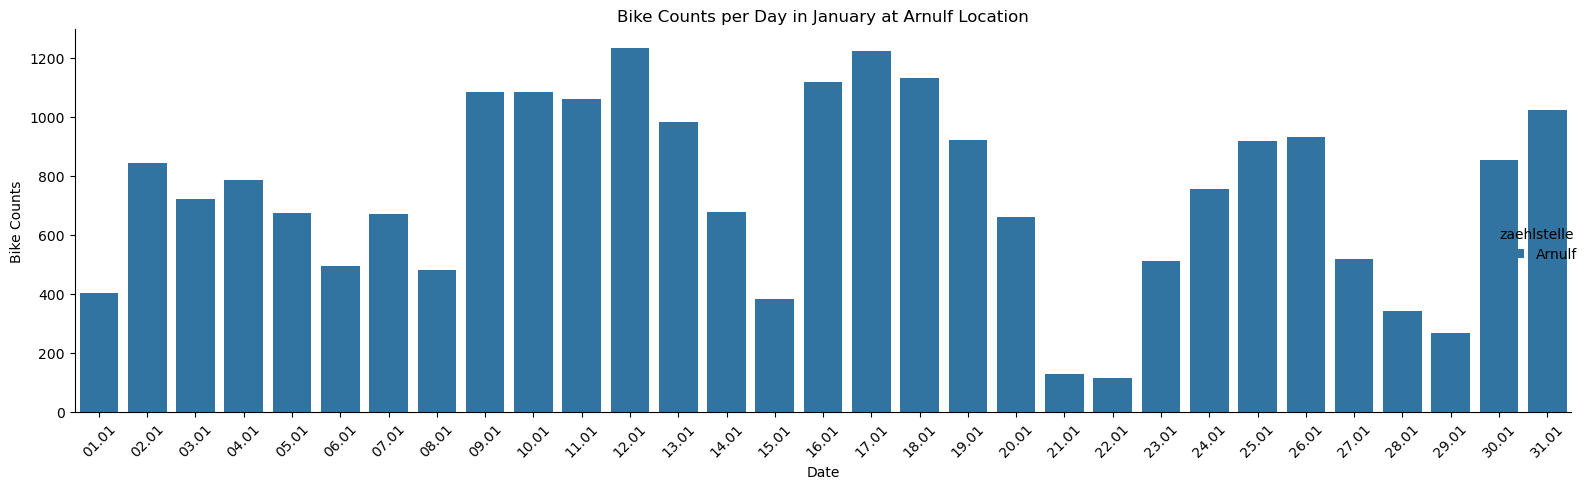

In [54]:
sns.catplot(data=df_muc_2023_arnulf_january, x='datum', y='gesamt', hue='zaehlstelle', kind='bar', aspect=3)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Bike Counts per Day in January at Arnulf Location')
plt.xlabel('Date')
plt.ylabel('Bike Counts')
plt.tight_layout()
plt.show()

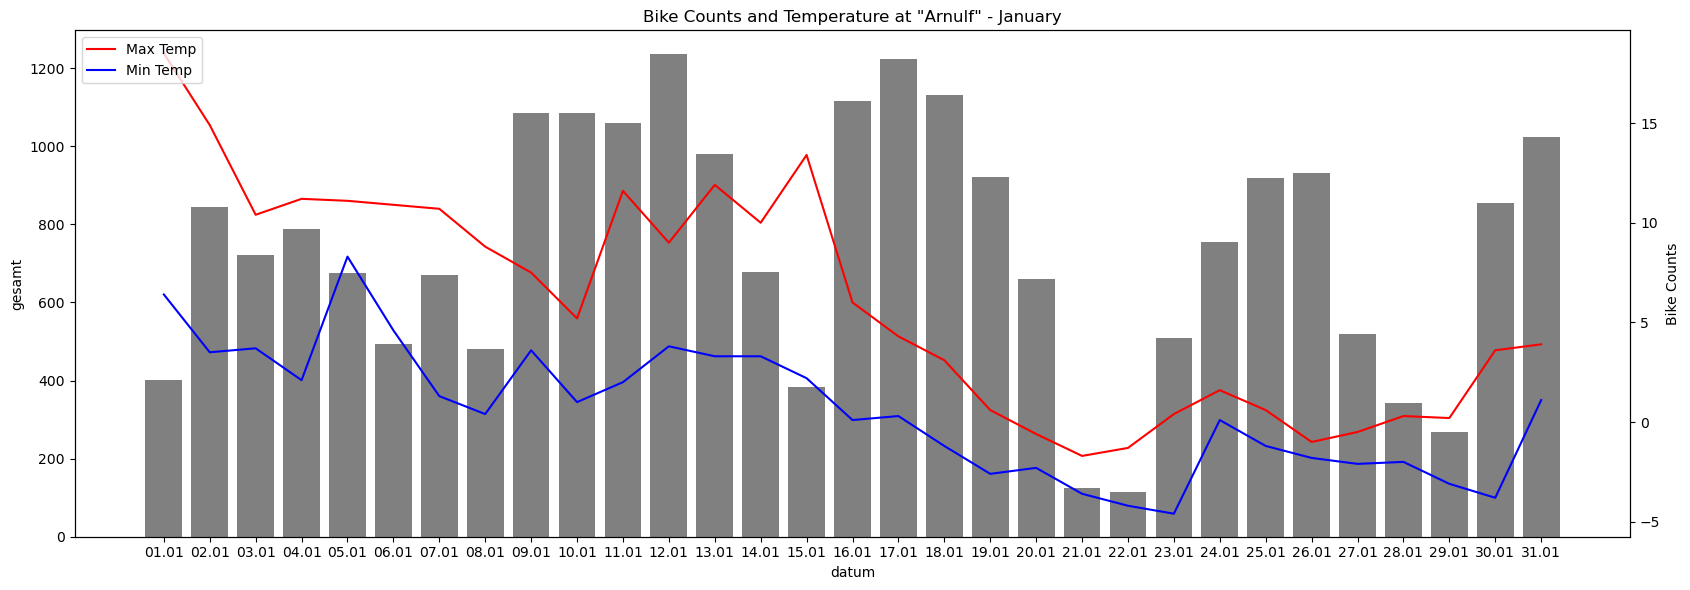

In [62]:
# Plotting
plt.figure(figsize=(17, 6))

# Plot bike counts as a bar plot in grey color
sns.barplot(data=df_muc_2023_arnulf_january, x='datum', y='gesamt', color='grey')

# Create a secondary y-axis for temperature
ax2 = plt.gca().twinx()

# Plot max temperature as a line plot in red color on the secondary y-axis
ax2.plot(df_muc_2023_arnulf_january['datum'], df_muc_2023_arnulf_january['max.temp'], color='red', label='Max Temp')
ax2.set_ylabel('Max Temp (°C)')

# Plot min temperature as a line plot in blue color on the secondary y-axis
ax2.plot(df_muc_2023_arnulf_january['datum'], df_muc_2023_arnulf_january['min.temp'], color='blue', label='Min Temp')
ax2.set_ylabel('Temperature (°C)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # 'ha' parameter sets horizontal alignment to 'right'

# Add title and labels
plt.title('Bike Counts and Temperature at "Arnulf" - January')
plt.xlabel('Date (DD.MM)')
plt.ylabel('Bike Counts')

# Add legend
plt.legend(loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

In [63]:
# ANumber of Data Capture Locations for Munich in 2023
num_locations = df_muc_2023['zaehlstelle'].nunique()
print("Number of different locations:", num_locations)


Number of different locations: 6


In [64]:
# Assuming df_muc_2023 is your DataFrame containing the data for Munich in 2023
# Get unique locations
unique_locations = df_muc_2023['zaehlstelle'].unique()
print(unique_locations)

['Arnulf' 'Kreuther' 'Olympia' 'Hirsch' 'Margareten' 'Erhardt']


/var/folders/ch/91lhzbmj5qz7s7pzsvt5_5t00000gn/T/ipykernel_7259/2306596970.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_january['datum'] = df_january['datum'].dt.strftime('%d.%m')
/var/folders/ch/91lhzbmj5qz7s7pzsvt5_5t00000gn/T/ipykernel_7259/2306596970.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_january['datum'] = df_january['datum'].dt.strftime('%d.%m')
/var/folders/ch/91lhzbmj5qz7s7pzsvt5_5t00000gn/T/ipykernel_7259/2306596970.py:20: SettingWithCopyWarning: 
A value is trying to be

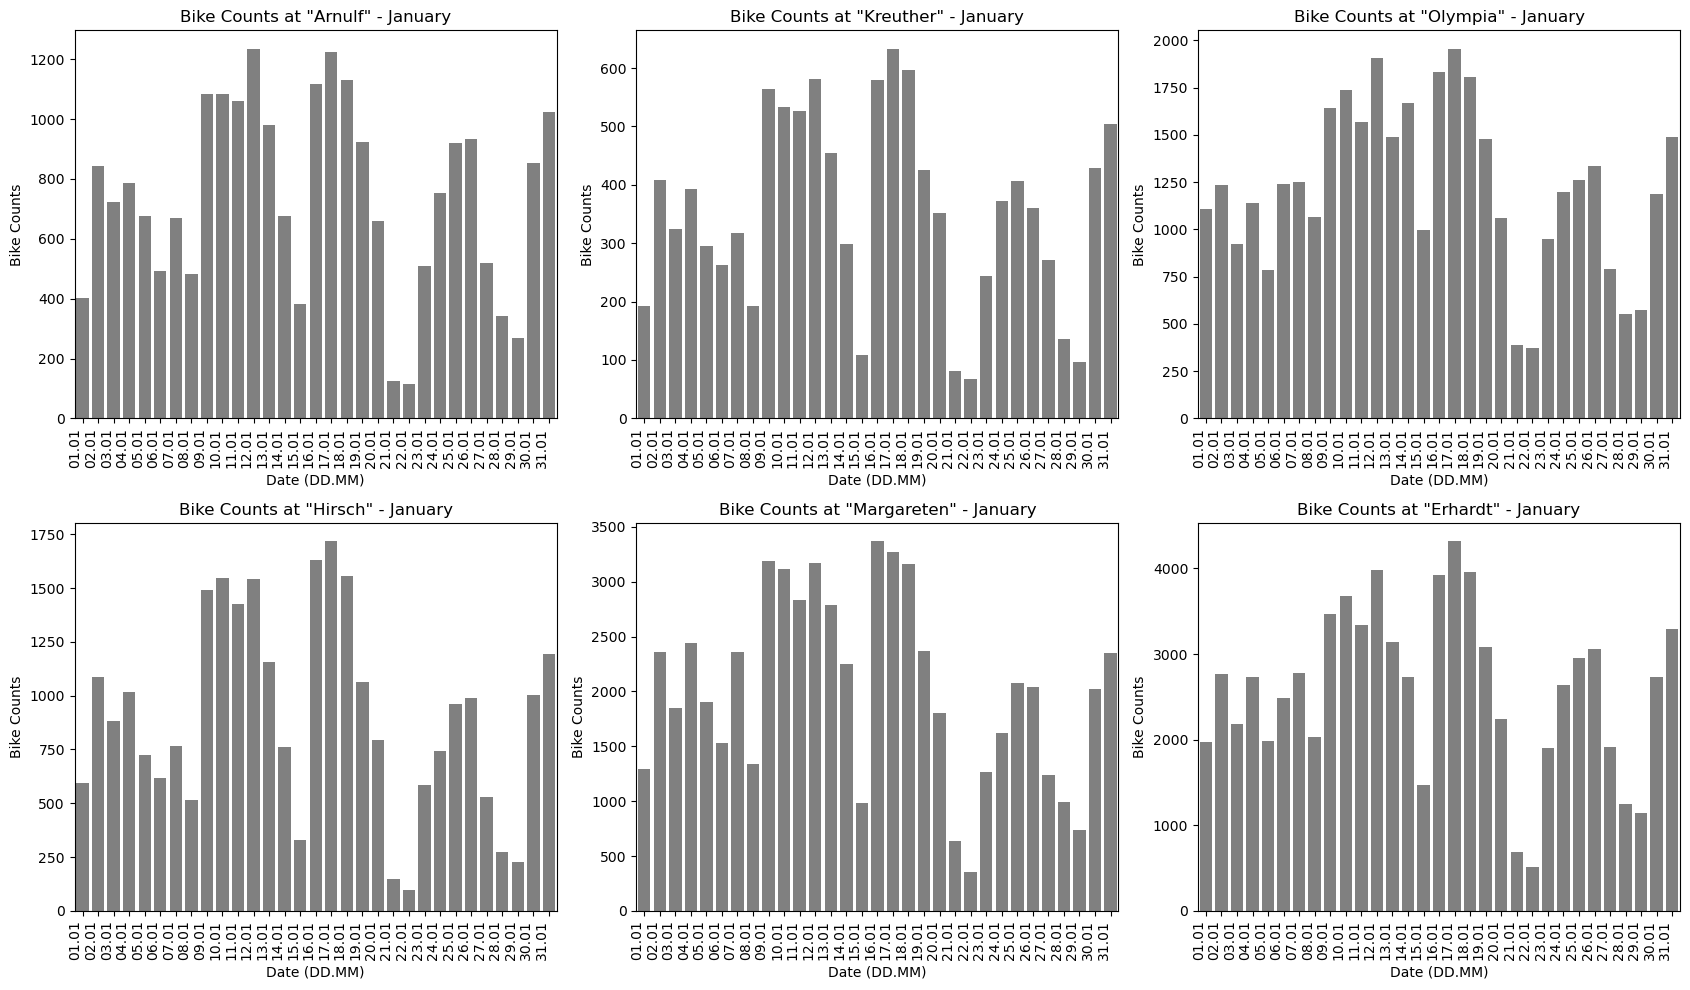

In [67]:
# Assuming df_muc_2023 is your DataFrame containing the data for Munich in 2023
# Assuming num_locations contains the number of unique locations
# Assuming unique_locations contains the list of unique locations

# Create a figure and six subplots
fig, axs = plt.subplots(2, 3, figsize=(17, 10))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate over each unique location
for i, location in enumerate(unique_locations):
    # Filter the DataFrame for the current location
    df_location = df_muc_2023[df_muc_2023['zaehlstelle'] == location]
    
    # Filter the DataFrame for January
    df_january = df_location[df_location['datum'].dt.month == 1]

    # Extract day and month from the "datum" column and format it as DD.MM
    df_january['datum'] = df_january['datum'].dt.strftime('%d.%m')

    # Plotting
    # Set the current subplot
    plt.sca(axs[i])

    # Plot bike counts as a bar plot in grey color
    sns.barplot(data=df_january, x='datum', y='gesamt', color='grey')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90, ha='right')

    # Add title and labels
    plt.title(f'Bike Counts at "{location}" - January')
    plt.xlabel('Date (DD.MM)')
    plt.ylabel('Bike Counts')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()
